In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plot
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [2]:
#Importing the data
data = pd.read_excel(r"C:\Users\Abhimkul\Downloads\Variables and Transients.xlsx")
flux = data["Flux (mW/m^2)"].dropna().to_numpy().reshape(-1,1)
lum = data["Luminosity (ergs/sec)"].dropna().to_numpy()
dist = data["Distance"].dropna().to_numpy()
sr_class = data["Source Class"].dropna().to_numpy()
bp_rp = data["bp_rp"].dropna().to_numpy()
Absolute_G = data["Absolute G"].dropna().to_numpy()
sr_no = np.linspace(1,746,746)

In [3]:
#Checking the source class
count = Counter(sr_class)
print(count)
print("k = ", len(count))

Counter({'SS_IB': 430, 'YSO': 107, 'IB': 104, 'IB_ACS': 51, 'CV': 37, 'LPV': 12, 'XRB': 3, 'WR': 1, 'PSR': 1})
k =  9


In [4]:
np.shape(flux)

(746, 1)

In [5]:
#Replacing sources by their numbers
sr_class_new = sr_class

sr_class_new[sr_class_new  == "SS_IB"] = 0
sr_class_new[sr_class_new  == "YSO"] = 1
sr_class_new[sr_class_new  == "IB"] = 2
sr_class_new[sr_class_new  == "IB_ACS"] = 3
sr_class_new[sr_class_new  == "CV"] = 4
sr_class_new[sr_class_new  == "LPV"] = 5
sr_class_new[sr_class_new  == "XRB"] = 6
sr_class_new[sr_class_new  == "WR"] = 7
sr_class_new[sr_class_new  == "PSR"] = 8

In [30]:
# K-Nearest neighbour classification
k_nn = KNeighborsClassifier(n_neighbors = 9, weights="distance")
target = np.array(sr_class_new, dtype=int)  

#Data 
data_1 = np.column_stack((bp_rp,Absolute_G))

#KNN classification
y_knn = k_nn.fit(data_1,target)
y_knn

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
y_knn

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'distance'}

In [22]:
#Checking
new_data = np.array([[2.21e-12,1.73,9.13]])
k_nn.predict(new_data)

array([0])

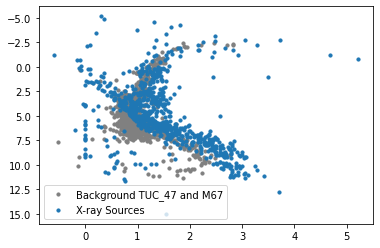

In [ ]:
#Plotting the HR Diagram Background
#Data has been copy pasted saved and deleted later due to the space issue for m67 and TUC_47
plot.scatter(bp_rp_TUC_47,AbsoluteGmagfor_TUC_47, color = "grey", label = "Background TUC_47 and M67", s = 10)
plot.scatter(bp_rp_for_m67,Absolute_gmag_m67, color = "grey", s= 11)
plot.scatter(bp_rp,Absolute_G,label = "X-ray Sources", s = 10)
plot.legend()
plot.gca().invert_yaxis()
#plot.rcParams["lines.marker"] = 100

In [106]:
#Classification on the basis of labels 
label = [0,1,2,3,4,5,6,7]
grouped_data = {label: data_1[target == label] for label in label}
#grouped_data

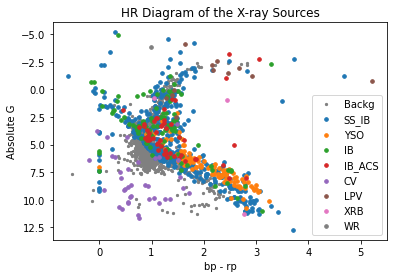

In [118]:
#Final Plotting and original labelling 
sour = ['SS_IB','YSO','IB','IB_ACS','CV','LPV','XRB','WR','PSR']

#Background
plot.scatter(bp_rp_TUC_47,AbsoluteGmagfor_TUC_47, color = "grey", label = "Backg", s = 5)
plot.scatter(bp_rp_for_m67,Absolute_gmag_m67, color = "grey", s= 5)
plot.xlabel("bp - rp")
plot.ylabel("Absolute G")
plot.title("HR Diagram of the X-ray Sources")

#Plot
for label, points in grouped_data.items():
    plot.scatter(points[:,0], points[:,1], label = sour[label], s = 13)
    plot.legend()
    
plot.gca().invert_yaxis()
